### 앙상블!!!!
> 너무 즐거워요 :)
>> 좋아요!

- 그만해
- 아아
    - 아아
    -- 아아
    - 으아아
        - 으아아
            - 으아아아아
- 아아    


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.model_selection import train_test_split

In [47]:
import matplotlib.pyplot as plt
import mglearn

In [23]:
X,y = make_moons(n_samples = 500, noise = 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [24]:
bag_clf = BaggingClassifier (DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [25]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

In [41]:
print(y_pred)
print(dt_y_pred)

[1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
[1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]


In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)

In [27]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9306666666666666

In [21]:

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [51]:
Xm, ym = make_moons(n_samples=200, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test =train_test_split(Xm, ym, stratify=ym, random_state=42)

In [67]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-2, random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

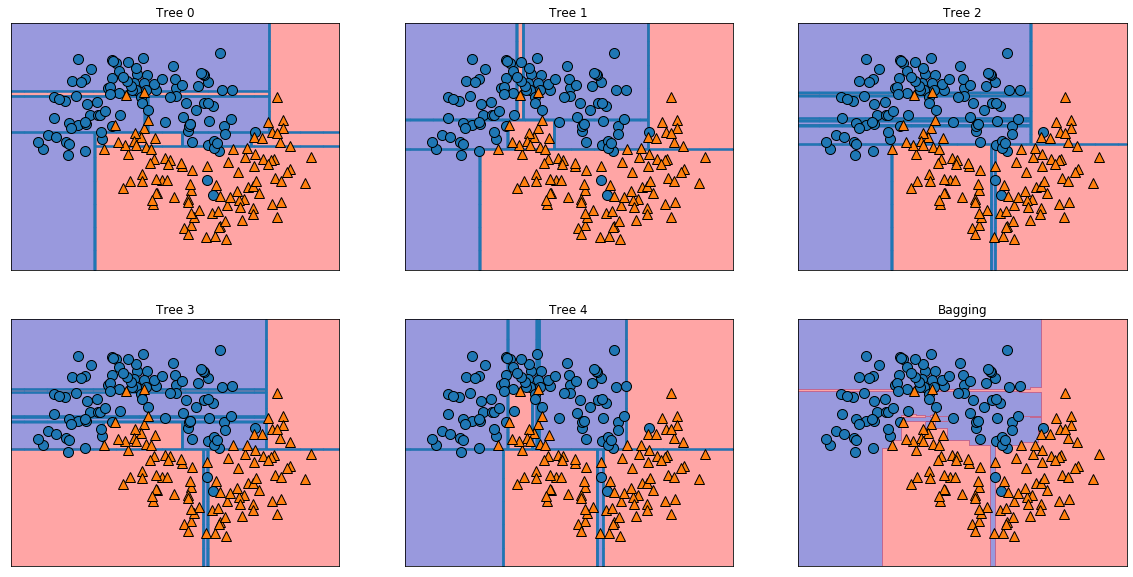

In [71]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)

plt.show()

랜덤 포레스트!!!
==============

- 앙상블에서 이어집니다..


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
RandomForest = RandomForestClassifier(n_estimators=5, n_jobs=-2, random_state=42)
RandomForest.fit(Xm_train,ym_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-2,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

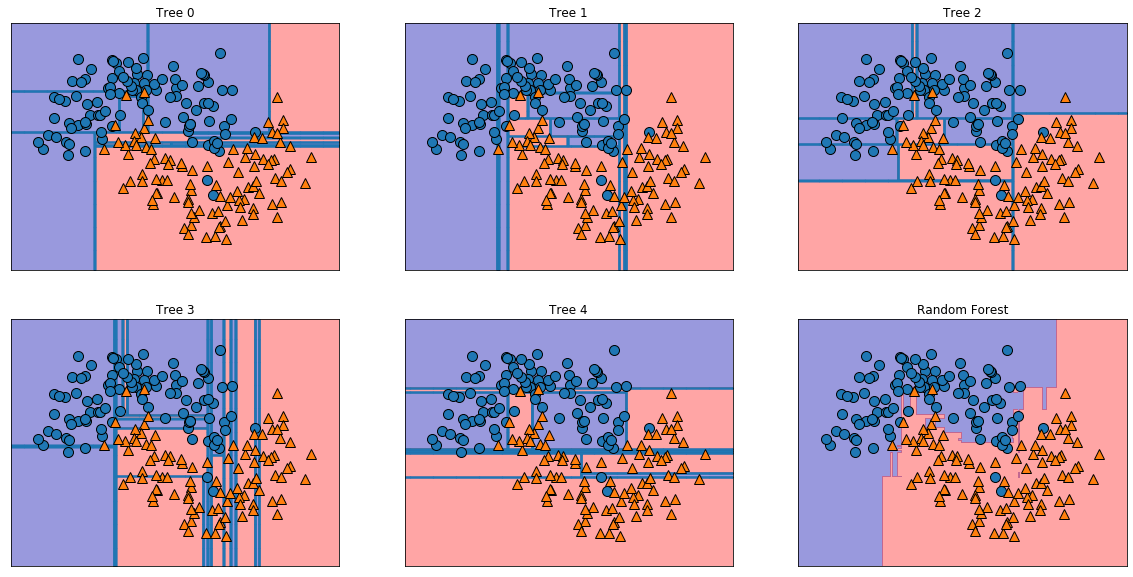

In [81]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(), RandomForest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree, ax=ax)

mglearn.plots.plot_2d_separator(RandomForest,Xm,fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)

plt.show()

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True, alpha=0.4)
axes[1,1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym,ax=axes[1,1])
'''
mglearn.plots.plot_2d_separator(RandomForest,Xm,fill=True, ax=axes[1,2], alpha=0.4)
axes[1,2].set_title("Random Forest")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
'''

plt.show()

In [131]:
Xm

array([[ 0.12736721,  1.06151101],
       [-0.23591561,  0.56283978],
       [ 0.7293696 , -0.37324203],
       [ 1.97862644,  0.5055932 ],
       [ 1.44350697, -0.48012805],
       [-0.90000594,  0.99099659],
       [ 2.07755301, -0.11619467],
       [ 0.2505165 ,  0.8742473 ],
       [-0.71992488,  1.01058284],
       [-0.13131616,  0.08109134],
       [ 1.57864658, -0.07080413],
       [-0.84184742,  0.79660087],
       [ 0.52246844,  0.89556061],
       [ 2.06598466,  0.181014  ],
       [ 1.50588135, -0.33187252],
       [ 1.46293229,  0.03332927],
       [-1.29718029,  0.14149631],
       [ 0.99608296,  0.20121497],
       [ 0.08511544,  0.95510631],
       [-0.30162882,  1.21311425],
       [ 0.70394786,  0.44798129],
       [ 0.72988321, -0.80331411],
       [ 1.59739605,  0.3538577 ],
       [ 0.61026418,  0.54140798],
       [ 1.59033704,  0.0790401 ],
       [ 1.57259425, -0.59625587],
       [ 0.26172482, -0.41121403],
       [ 0.2016153 , -0.5484029 ],
       [-0.3084057 ,

In [115]:
Xm

array([[ 0.12736721,  1.06151101],
       [-0.23591561,  0.56283978],
       [ 0.7293696 , -0.37324203],
       [ 1.97862644,  0.5055932 ],
       [ 1.44350697, -0.48012805],
       [-0.90000594,  0.99099659],
       [ 2.07755301, -0.11619467],
       [ 0.2505165 ,  0.8742473 ],
       [-0.71992488,  1.01058284],
       [-0.13131616,  0.08109134],
       [ 1.57864658, -0.07080413],
       [-0.84184742,  0.79660087],
       [ 0.52246844,  0.89556061],
       [ 2.06598466,  0.181014  ],
       [ 1.50588135, -0.33187252],
       [ 1.46293229,  0.03332927],
       [-1.29718029,  0.14149631],
       [ 0.99608296,  0.20121497],
       [ 0.08511544,  0.95510631],
       [-0.30162882,  1.21311425],
       [ 0.70394786,  0.44798129],
       [ 0.72988321, -0.80331411],
       [ 1.59739605,  0.3538577 ],
       [ 0.61026418,  0.54140798],
       [ 1.59033704,  0.0790401 ],
       [ 1.57259425, -0.59625587],
       [ 0.26172482, -0.41121403],
       [ 0.2016153 , -0.5484029 ],
       [-0.3084057 ,

In [123]:
from sklearn.datasets import load_iris

In [124]:
iris = load_iris()

In [126]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
for name, importance in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, '=', importance)

sepal length (cm) = 0.11249225099876375
sepal width (cm) = 0.02311928828251033
petal length (cm) = 0.4410304643639577
petal width (cm) = 0.4233579963547682


In [141]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

부스티이이이이잉!! (Boosting)
===============
- 너무 즐겁다

In [147]:
import numpy as np

In [152]:
def loadSimpleData():
    dataMat = np.matrix([[1,2.1],[2,1.1],[1.3,1.],[1.,1.],[2.,1.]])
    classLabels = [1.0,1.0,-1.0,-1.0,1.0]
    return dataMat, classLabels

In [161]:
datMat, classLabels = loadSimpleData()

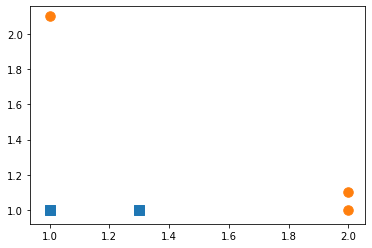

In [265]:
xcord1= list()
xcord0= list()
ycord1= list()
ycord0= list()
for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(datMat[i,0]), ycord1.append(datMat[i,1])
    else:
        xcord0.append(datMat[i,0]), ycord0.append(datMat[i,1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord0,ycord0,marker='s', s=90)
ax.scatter(xcord1,ycord1,marker='o', s=90)
plt.show()

In [158]:
a = [for i in ]
plt.scatter(dataMat)

TypeError: scatter() missing 1 required positional argument: 'y'

In [192]:
def stumpClassify(dataMatrix,dimen,threshVal, threshIneq):
    retArray = np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq=='lt':
        retArray[dataMatrix[:,dimen]<=threshVal] =-1.0
    else:
        retArray[dataMatrix[:,dimen]>threshVal] = -1.0
    return retArray

In [275]:
def buildStump (dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr);
    labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m,1)))
    minError = np.inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
#                 print(predictedVals)
                errArr = np.mat(np.ones((m,1)))
                errArr[predictedVals == labelMat] =0
                weightedError = D.T*errArr
#                 print('splot: dim{}, thresh {}, thresh ineqal {}, the weighted error is {}'.format(i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    print(bestClasEst)
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [276]:
D = np.mat(np.ones((5,1))/3)
buildStump (datMat,classLabels, D)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]


({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.33333333]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [239]:
D = np.mat(np.ones((5,1))/5)
buildStump (datMat,classLabels, D)

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [240]:
from numpy import *

In [259]:
def adaBoostTrainDS(dataArr, classLabels,numlt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m,1))/m)
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numlt):
        bestStump, error, classEst = buildStump(dataArr, classLabels,D)
        print('D : {}'.format(D.T))
        alpha = float(0.5 * log((1.0-error)/max(error,1e-16)))
#         print('!!!!!',alpha)
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        print('classEst : {}'.format(classEst.T))
        expon = multiply(-1*alpha*mat(classLabels).T, classEst)
        D = multiply(D, exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        print('aggClassEst : {} '.format(aggClassEst.T))
        aggErrors = multiply(sign(aggClassEst)!= mat(classLabels).T, ones((m,1)))
        errorRate = aggErrors.sum()/m
        print('total error : {}'.format(errorRate))
#         print('!!!!!',bestStump['alpha'])
        if errorRate == 0.0:
            break
    return weakClassArr
        

In [260]:
adaBoostTrainDS(datMat, classLabels,9)

D : [[0.2 0.2 0.2 0.2 0.2]]
classEst : [[-1.  1. -1. -1.  1.]]
aggClassEst : [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]] 
total error : 0.2
D : [[0.5   0.125 0.125 0.125 0.125]]
classEst : [[ 1.  1. -1. -1. -1.]]
aggClassEst : [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]] 
total error : 0.2
D : [[0.28571429 0.07142857 0.07142857 0.07142857 0.5       ]]
classEst : [[1. 1. 1. 1. 1.]]
aggClassEst : [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]] 
total error : 0.0


[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [267]:
datMat

matrix([[1. , 2.1],
        [2. , 1.1],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

In [269]:
int(3)/int(5)

0.6

In [271]:
int(10/3)

3